# About 시각화


In [1]:
def stockDataReader_fn(
    stock_name, c_code="K", index=False, start_date=None, end_date=None
):
    import FinanceDataReader as fdr
    import datetime
    import os
    import pandas as pd

    if c_code == "A":
        stock_df = fdr.DataReader(stock_name, start_date, end_date)
        return stock_df
    elif c_code == "K" and index:
        stock_df = fdr.DataReader("KS11", start_date, end_date)
        return stock_df
    else:
        # 1. 저장 파일 형식에 필요한 Data 불러오기
        today_year = datetime.datetime.today().year
        today_month = datetime.datetime.today().month
        today_day = datetime.datetime.today().day

        # 2. KRX 종목 DataFrame 존재 여부 확인
        csv_path = "krx_df_{}_{}_{}.csv".format(today_year, today_month, today_day)

        if os.path.isfile(csv_path):
            krx_df = pd.read_csv(csv_path)
        else:
            krx_df = fdr.StockListing("KRX")
            krx_df.to_csv(csv_path)

        # 3. 종목 코드 찾기
        if stock_name in krx_df["Name"].values:
            stock_symbol = krx_df[krx_df["Name"] == stock_name]["Code"].values[0]
        else:
            print("해당 종목이 없습니다.")
            raise "해당 종목이 없습니다."

        stock_df = fdr.DataReader(stock_symbol, start=start_date, end=end_date)
        return stock_df

In [2]:
df = stockDataReader_fn("", c_code="K", index=True, start_date="2020")
df

,Open,High,Low,Close,Volume,Change,UpDown,Comp,Amount,MarCap
Date,,,,,,,,,,
2020-01-02,2201.21,2202.32,2171.84,2175.17,494677752,-0.0102,2,-22.50,4638167309579,1461424793589993
2020-01-03,2192.58,2203.38,2165.39,2176.46,631562785,0.0006,1,1.29,5763662746548,1462298971774498
2020-01-06,2154.97,2164.42,2149.95,2155.07,592670719,-0.0098,2,-21.39,5156540935534,1448385085188395
2020-01-07,2166.60,2181.62,2164.27,2175.54,568235609,0.0095,1,20.47,5143511908278,1462298814406954
2020-01-08,2156.27,2162.32,2137.72,2151.31,913830628,-0.0111,2,-24.23,8750722208310,1446631314388659
...,...,...,...,...,...,...,...,...,...,...
2026-02-10,5350.21,5363.62,5286.67,5301.69,712267871,0.0007,1,3.65,23275929869547,4376615585478883
2026-02-11,5293.75,5374.23,5257.53,5354.49,753767377,0.0100,1,52.80,25625896916781,4421255293234541
2026-02-12,5425.39,5522.27,5399.52,5522.27,750614562,0.0313,1,167.78,32322625268341,4560825989035452


In [4]:
df_csv = df["Close"]
df_csv

Date
2020-01-02    2175.17
2020-01-03    2176.46
2020-01-06    2155.07
2020-01-07    2175.54
2020-01-08    2151.31
               ...   
2026-02-10    5301.69
2026-02-11    5354.49
2026-02-12    5522.27
2026-02-13    5507.01
2026-02-19    5669.04
Name: Close, Length: 1505, dtype: float64

In [5]:
df_csv.to_csv("kospi.csv")

In [13]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

df_kospi = pd.read_csv("kospi.csv")
df_kospi.index = df_kospi["Date"]
df_kospi

,Date,Close
Date,,
2020-01-02,2020-01-02,2175.17
2020-01-03,2020-01-03,2176.46
2020-01-06,2020-01-06,2155.07
2020-01-07,2020-01-07,2175.54
2020-01-08,2020-01-08,2151.31
...,...,...
2026-02-10,2026-02-10,5301.69
2026-02-11,2026-02-11,5354.49
2026-02-12,2026-02-12,5522.27


<Axes: xlabel='Date'>

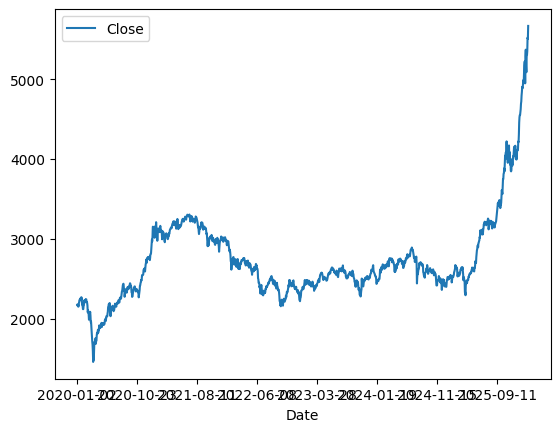

In [14]:
df_kospi.plot()

<Figure size 640x480 with 0 Axes>

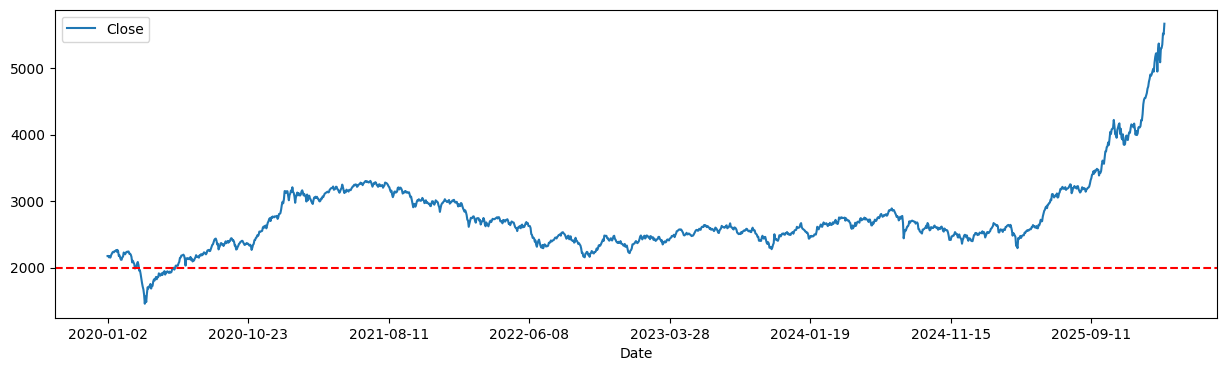

In [15]:
plt.figure()  # 도화지 생성

df_kospi.plot(figsize=(15, 4))

plt.axhline(2000, linestyle="--", color="red")  # 수평선 그리기

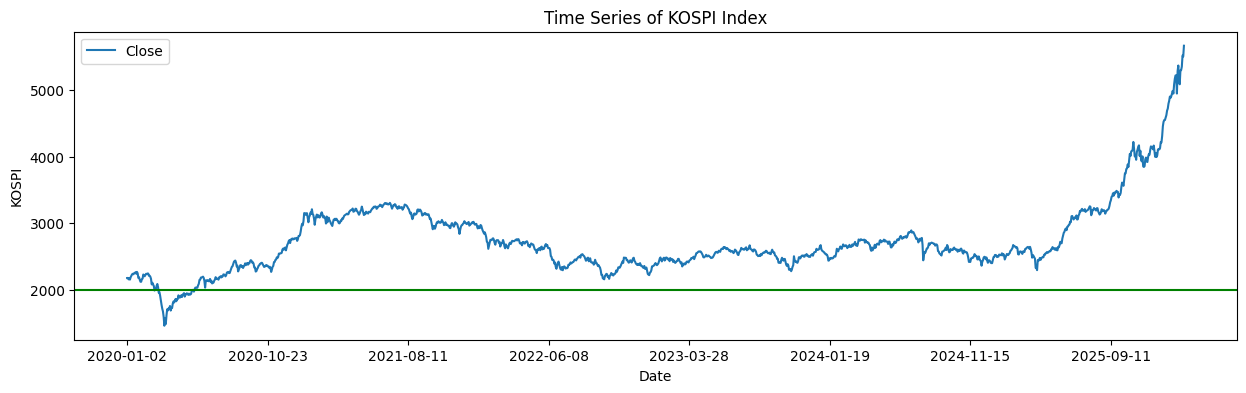

In [18]:
fig, ax = plt.subplots()

df_kospi.plot(kind="line", ax=ax, figsize=(15, 4))

ax.axhline(2000, linestyle="-", color="green")  # 수평선 그리기

ax.set(xlabel="Date", ylabel="KOSPI", title="Time Series of KOSPI Index")

plt.show()

# 두개 이상의 그래프


In [19]:
df_samsung = stockDataReader_fn("삼성전자", c_code="K", index=False, start_date="2020")
df_samsung


,Open,High,Low,Close,Volume,Change
Date,,,,,,
2020-01-02,55500,56000,55000,55200,12993228,-0.010753
2020-01-03,56000,56600,54900,55500,15422255,0.005435
2020-01-06,54900,55600,54600,55500,10278951,0.000000
2020-01-07,55700,56400,55600,55800,10009778,0.005405
2020-01-08,56200,57400,55900,56800,23501171,0.017921
...,...,...,...,...,...,...
2026-02-10,167400,168100,165500,165800,19369566,-0.003606
2026-02-11,164000,168600,162000,167800,22760242,0.012063
2026-02-12,171200,179600,170100,178600,41296011,0.064362


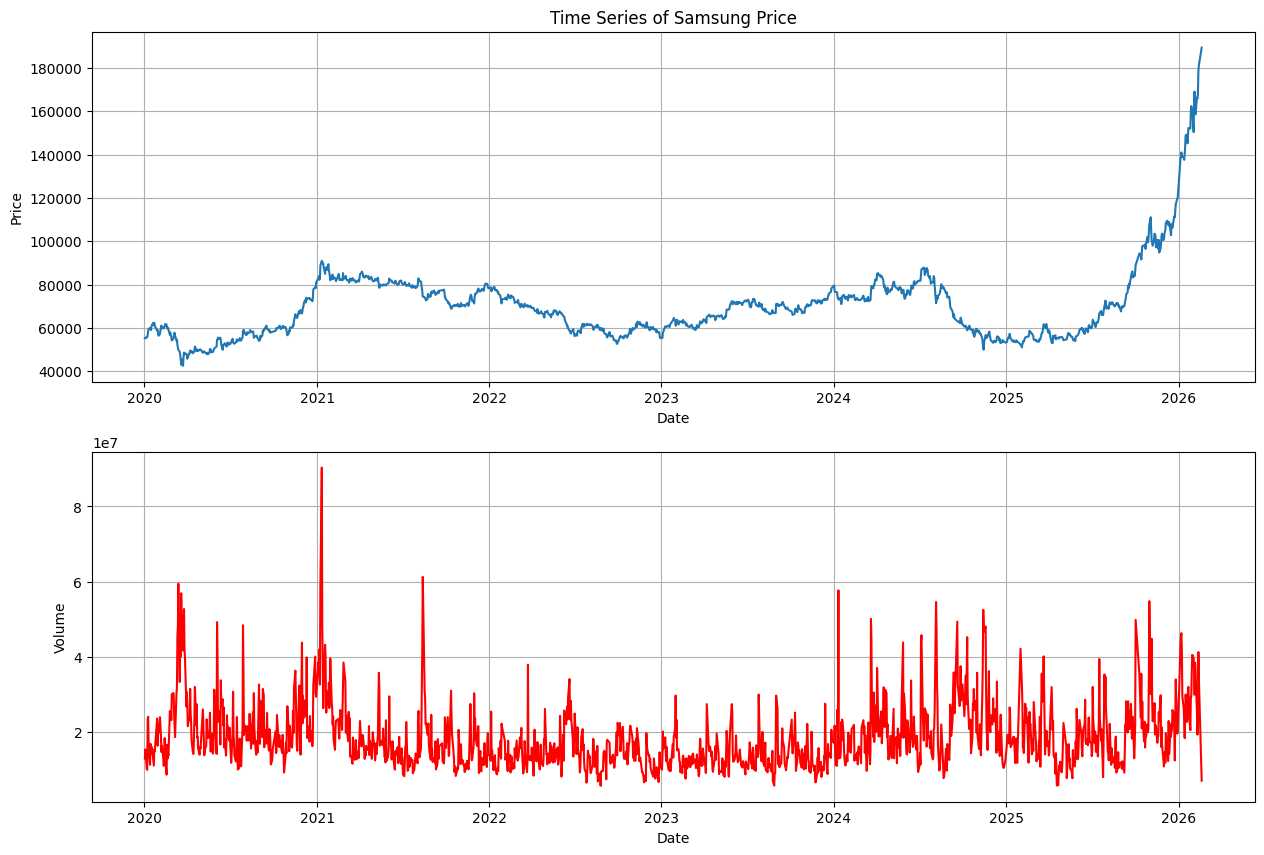

In [22]:
fig, axs = plt.subplots(2, 1, figsize=(15, 10))

axs[0].plot(df_samsung["Close"])
axs[0].grid(True)
axs[0].set(xlabel="Date", ylabel="Price", title="Time Series of Samsung Price")

axs[1].plot(df_samsung["Volume"], color="red")
axs[1].grid(True)
axs[1].set(xlabel="Date", ylabel="Volume")

plt.show()

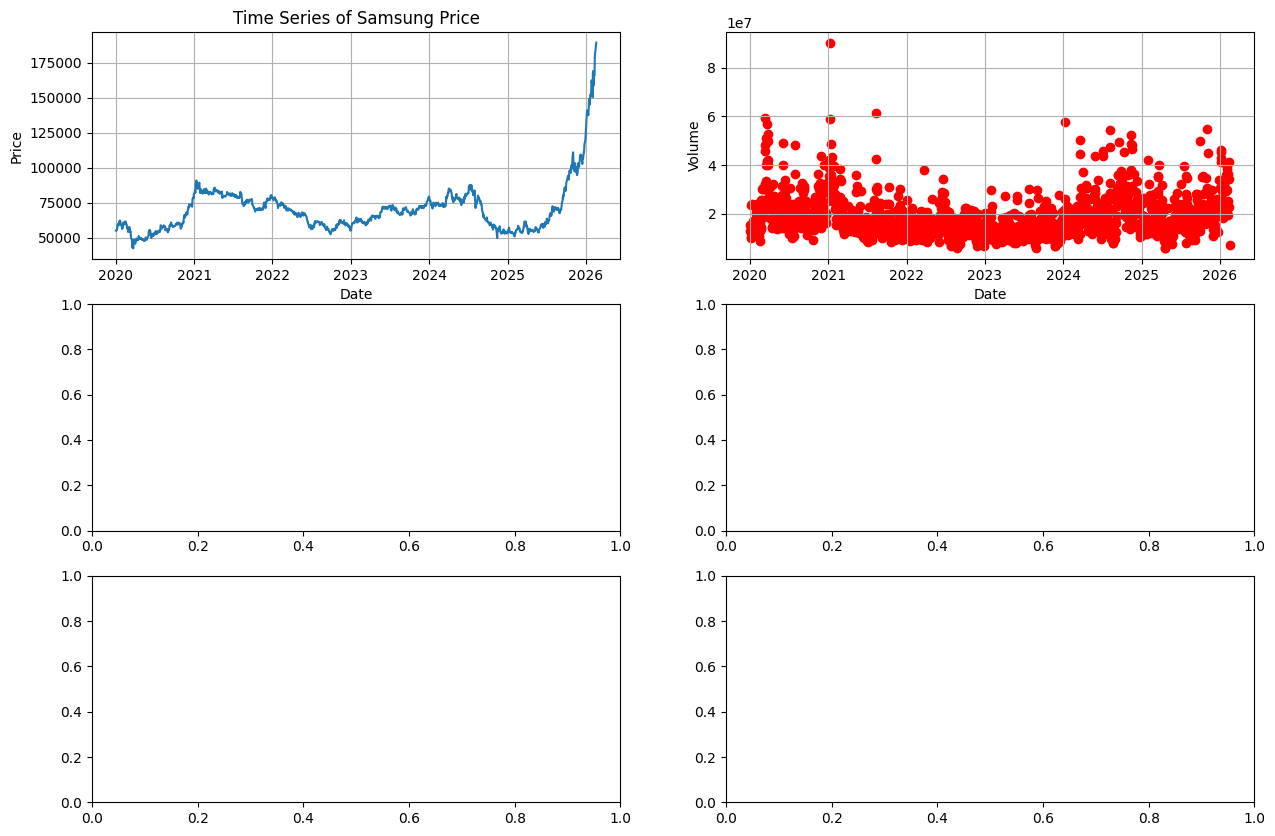

In [24]:
fig, axs = plt.subplots(3, 2, figsize=(15, 10))

axs[0, 0].plot(df_samsung["Close"])
axs[0, 0].grid(True)
axs[0, 0].set(xlabel="Date", ylabel="Price", title="Time Series of Samsung Price")

axs[0, 1].scatter(df_samsung.index, df_samsung["Volume"], color="red")
axs[0, 1].grid(True)
axs[0, 1].set(xlabel="Date", ylabel="Volume")

plt.show()

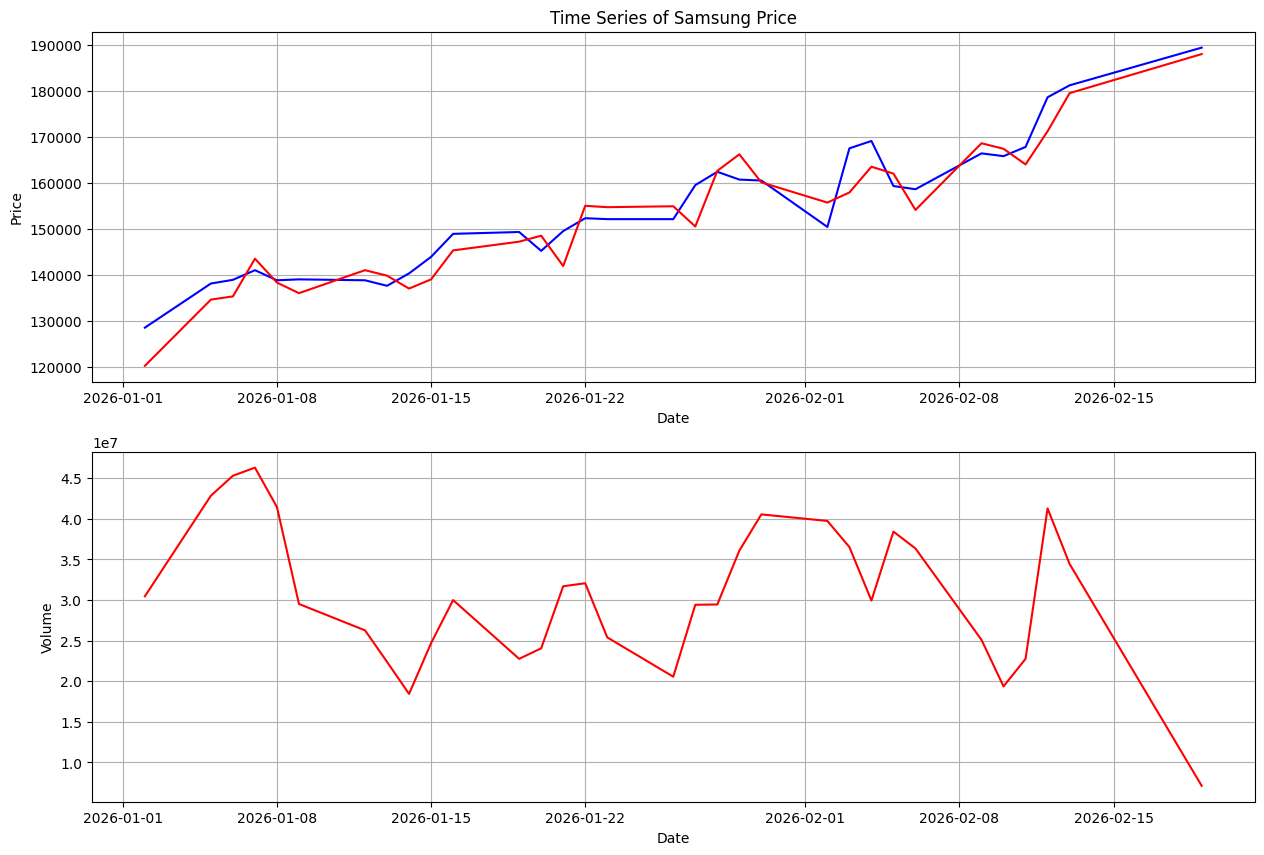

In [27]:
fig, axs = plt.subplots(2, 1, figsize=(15, 10))

axs[0].plot(df_samsung["Close"]["2026-01-01":], color="blue")
axs[0].grid(True)
axs[0].set(xlabel="Date", ylabel="Price", title="Time Series of Samsung Price")

axs[0].plot(df_samsung["Open"]["2026-01-01":], color="red")

axs[1].plot(df_samsung["Volume"]["2026-01-01":], color="red")
axs[1].grid(True)
axs[1].set(xlabel="Date", ylabel="Volume")

plt.show()